In [1]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

%matplotlib inline

Using TensorFlow backend.


In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [3]:
for col in hist.columns:
    print(col)
    

high
low
open
volumefrom
volumeto
close
conversionType
conversionSymbol


In [4]:
hist.head()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2020-02-18,13549.4,12730.5,12800.0,52.43,687572.51,13452.5,direct,
2020-02-19,13550.0,12393.8,13452.5,124.71,1652675.85,12730.9,direct,
2020-02-20,12881.9,12521.2,12730.9,56.55,718759.15,12762.8,direct,
2020-02-21,13083.4,12706.2,12762.8,59.93,771919.60,12846.5,direct,
2020-02-22,12914.5,12740.0,12846.5,18.00,231127.25,12804.4,direct,


In [5]:
def train_test_split(df, test_size = 0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

train, test = train_test_split(hist, test_size= 0.2)

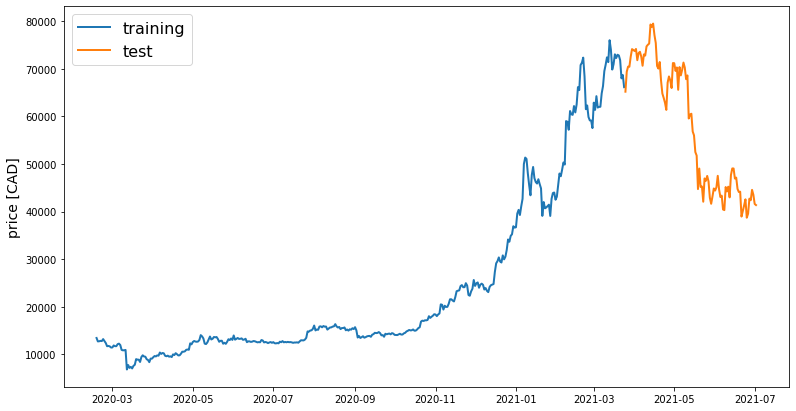

In [6]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train[target_col], test[target_col], 'training', 'test', title='')